# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [17]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

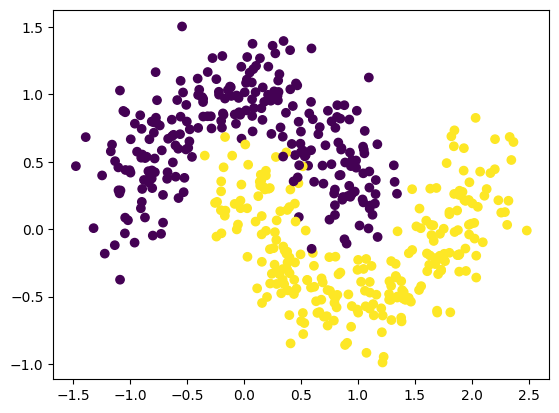

In [18]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

### YOUR CODE HERE

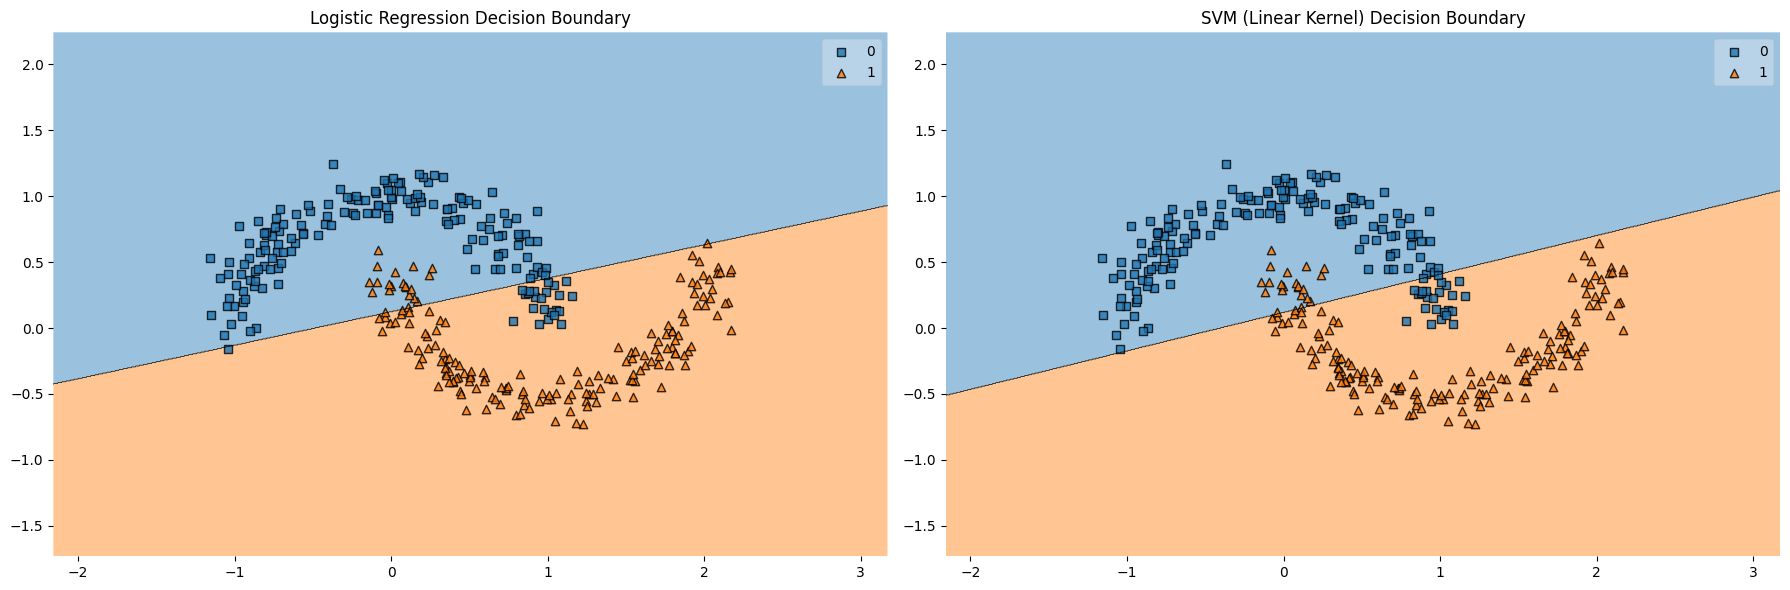

Logistic Regression Accuracy: 0.8733333333333333
SVM Accuracy: 0.8733333333333333


In [41]:
# Imports
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.3, random_state=42)

# Initialize models
lr = LogisticRegression()
svm = SVC(kernel='linear')

# Train Logistic Regression and SVM
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Create subplots to plot decision boundaries
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot decision regions for Logistic Regression
ax[0].set_title("Logistic Regression Decision Boundary")
plot_decision_regions(X_train, y_train, clf=lr, ax=ax[0])

# Plot decision regions for SVM
ax[1].set_title("SVM (Linear Kernel) Decision Boundary")
plot_decision_regions(X_train, y_train, clf=svm, ax=ax[1])

# Adjust layout and display
plt.tight_layout()
plt.show()

# Predict on test data
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Calculate accuracy or other metric
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"Logistic Regression Accuracy: {acc_lr}")
print(f"SVM Accuracy: {acc_svm}")


## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [21]:
### YOUR CODE HERE

In [42]:
# Import SVC with different kernels
from sklearn.svm import SVC

# Initialize models with different kernels
svc_poly = SVC(kernel='poly', degree=3, C=1.0)
svc_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svc_sigmoid = SVC(kernel='sigmoid', C=1.0)

# Train the models
svc_poly.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)
svc_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

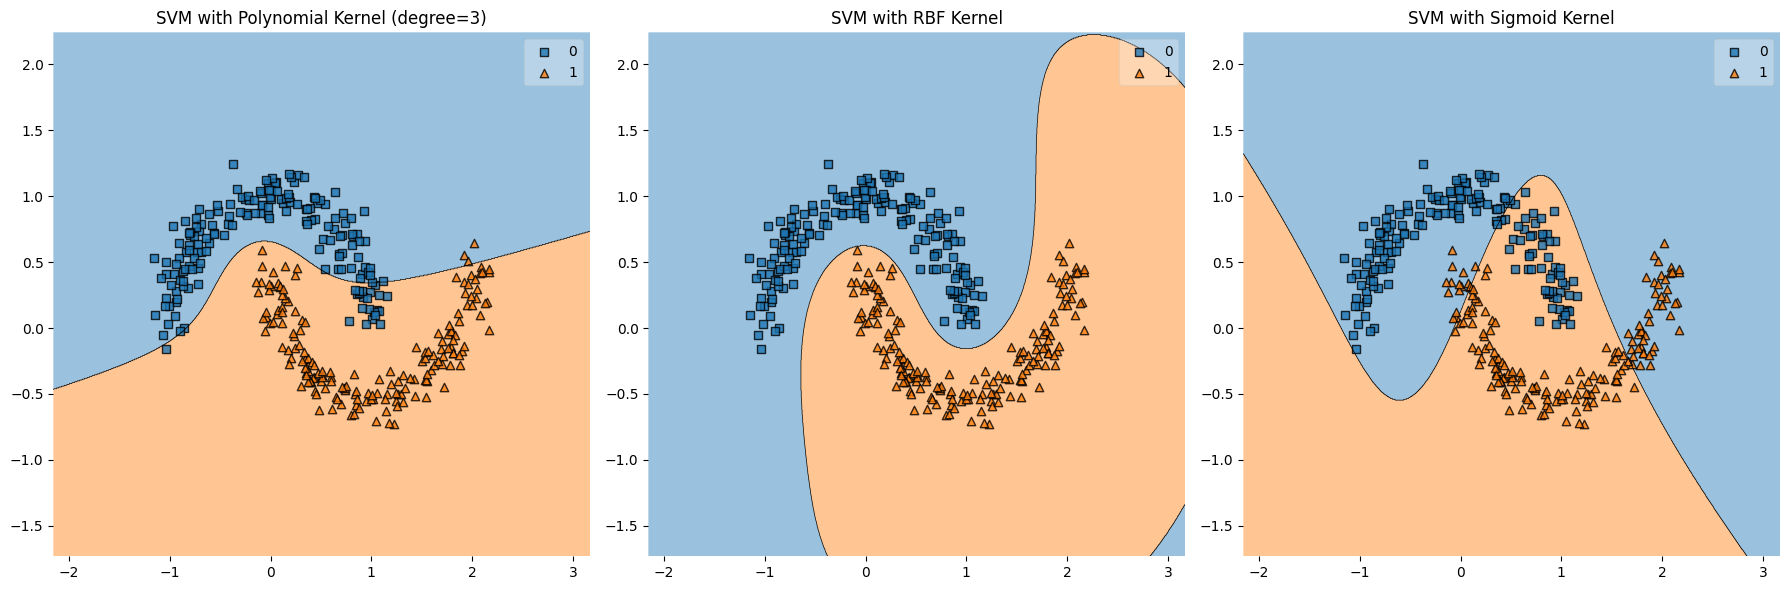

Polynomial Kernel Accuracy: 0.9266666666666666
RBF Kernel Accuracy: 1.0
Sigmoid Kernel Accuracy: 0.6066666666666667


In [43]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plot for Polynomial Kernel
ax[0].set_title("SVM with Polynomial Kernel (degree=3)")
plot_decision_regions(X_train, y_train, clf=svc_poly, ax=ax[0])

# Plot for RBF Kernel
ax[1].set_title("SVM with RBF Kernel")
plot_decision_regions(X_train, y_train, clf=svc_rbf, ax=ax[1])

# Plot for Sigmoid Kernel
ax[2].set_title("SVM with Sigmoid Kernel")
plot_decision_regions(X_train, y_train, clf=svc_sigmoid, ax=ax[2])

# Adjust layout
plt.tight_layout()
plt.show()

# Predict on test set
y_pred_poly = svc_poly.predict(X_test)
y_pred_rbf = svc_rbf.predict(X_test)
y_pred_sigmoid = svc_sigmoid.predict(X_test)

# Calculate the chosen metric (e.g., accuracy)
acc_poly = accuracy_score(y_test, y_pred_poly)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
acc_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

print(f"Polynomial Kernel Accuracy: {acc_poly}")
print(f"RBF Kernel Accuracy: {acc_rbf}")
print(f"Sigmoid Kernel Accuracy: {acc_sigmoid}")


Observation note:

I manually selecting some reasonable hyperparameters for the SVM models just to reduce time spending. 

then experiment with estimate the best hyperparameters rather than picking them randomly or manually by using Grid Search with Cross-Validation as a more robust and systematic method to search for optimal hyperparameters, which would likely improve performance. This method systematically tries combinations of hyperparameters to find the best ones for model, leading to better results.
and also experiment with random search to test which one would be helpful. 

As a result, seem like Grid Search and Random Search seem to sightly better than just manually selecting some reasonable hyperparameters and sigmoid definatly don't work well in this case. 

Best Polynomial Kernel Params: {'C': 1, 'degree': 3, 'kernel': 'poly'}
Best Polynomial Kernel Score: 0.9228571428571428
Best RBF Kernel Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best RBF Kernel Score: 1.0
Best Sigmoid Kernel Params: {'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best Sigmoid Kernel Score: 0.8485714285714285


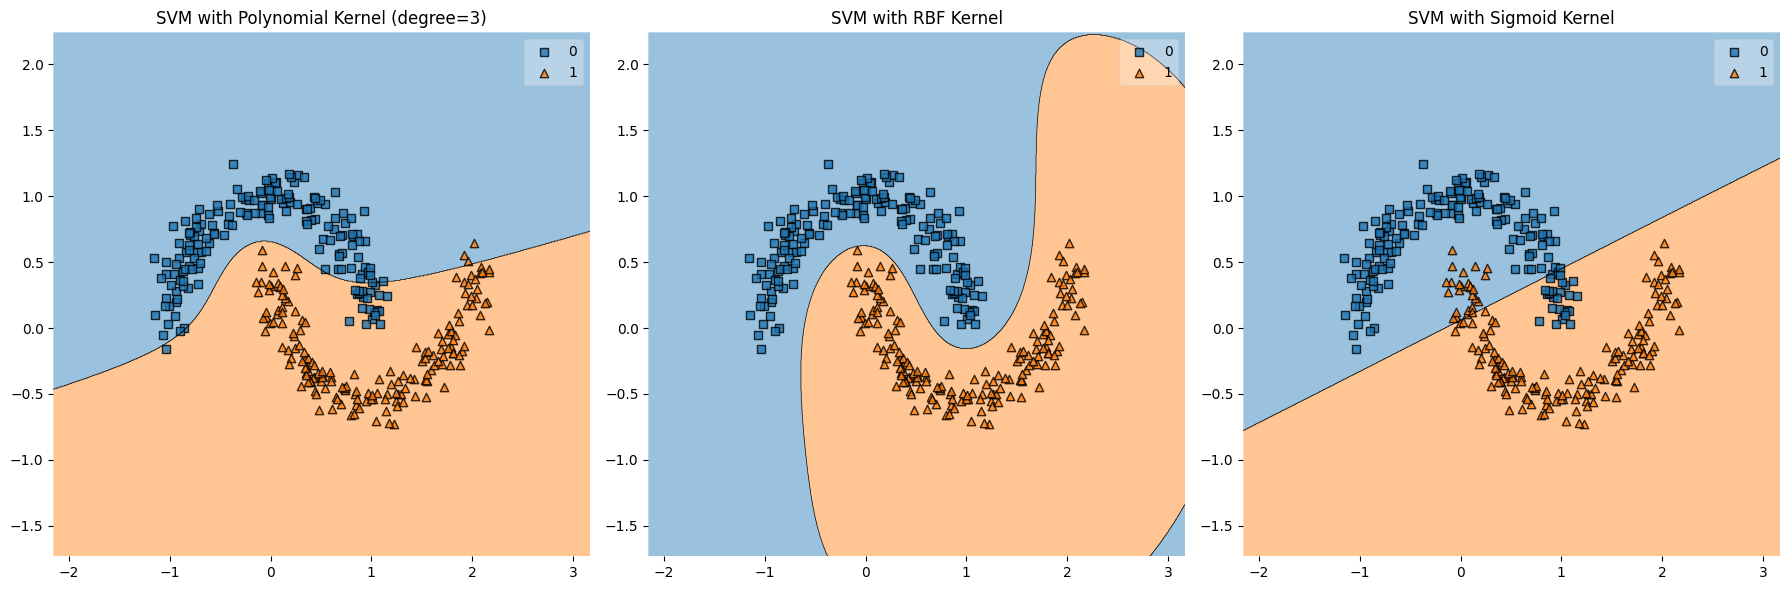

In [47]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

# Define parameter grid for different kernels
param_grid_poly = {
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5],  # Trying different degrees
    'C': [0.1, 1, 10]        # Different regularization strengths
}

param_grid_rbf = {
    'kernel': ['rbf'],
    'gamma': ['scale', 0.01, 0.1, 1],  # Trying different gamma values
    'C': [0.1, 1, 10]                  # Different regularization strengths
}

param_grid_sigmoid = {
    'kernel': ['sigmoid'],
    'gamma': ['scale', 0.01, 0.1, 1],  # Testing different gamma values
    'C': [0.1, 1, 10]                   # Testing different regularization strengths
}

# Set up GridSearchCV for each kernel
grid_search_poly = GridSearchCV(SVC(), param_grid_poly, cv=5, scoring='accuracy')
grid_search_rbf = GridSearchCV(SVC(), param_grid_rbf, cv=5, scoring='accuracy')
grid_search_sigmoid = GridSearchCV(SVC(), param_grid_sigmoid, cv=5, scoring='accuracy')

# Fit models
grid_search_poly.fit(X_train, y_train)
grid_search_rbf.fit(X_train, y_train)
grid_search_sigmoid.fit(X_train, y_train)

# Get best parameters and scores
print(f"Best Polynomial Kernel Params: {grid_search_poly.best_params_}")
print(f"Best Polynomial Kernel Score: {grid_search_poly.best_score_}")

print(f"Best RBF Kernel Params: {grid_search_rbf.best_params_}")
print(f"Best RBF Kernel Score: {grid_search_rbf.best_score_}")

print(f"Best Sigmoid Kernel Params: {grid_search_sigmoid.best_params_}")
print(f"Best Sigmoid Kernel Score: {grid_search_sigmoid.best_score_}")

# Plot the decision regions for the best models

# Use best estimators from Grid Search
best_poly = grid_search_poly.best_estimator_
best_rbf = grid_search_rbf.best_estimator_
best_sigmoid = grid_search_sigmoid.best_estimator_

# Plot decision regions for each kernel
fig, ax = plt.subplots(1, 3, figsize=(18, 6)) 

# Plot for Polynomial Kernel
ax[0].set_title(f"SVM with Polynomial Kernel (degree={grid_search_poly.best_params_['degree']})")
plot_decision_regions(X_train, y_train, clf=best_poly, ax=ax[0])

# Plot for RBF Kernel
ax[1].set_title("SVM with RBF Kernel")
plot_decision_regions(X_train, y_train, clf=best_rbf, ax=ax[1])

# Plot for Sigmoid Kernel
ax[2].set_title("SVM with Sigmoid Kernel")
plot_decision_regions(X_train, y_train, clf=best_sigmoid, ax=ax[2])

# Adjust layout
plt.tight_layout()
plt.show()


* What have happenned with classification quality?

seem like polynomial kernal also work well with adjust no of kernal but not as flexibly as the RBF kernel. RBF work well and lastly Sigmoid obviously not work well in this data since the decision boundary is almost linear.

* How did decision border changed for each kernel?
polynomial kernal:it creates a boundary based on a polynomial equation
RBF kernal: it use Gaussian function to create a boundary based on how close data points are to each other.
Sigmoid kernal: it applies a hyperbolic tangent function, which behaves somewhat like a linear separator.


* What degree have you chosen and why?
polynomial kernal with degree=3
because it make model fit the data well.



Best Polynomial Kernel Params (Random Search): {'kernel': 'poly', 'degree': 3, 'C': 100}
Best Polynomial Kernel Score (Random Search): 0.9257142857142856
Best RBF Kernel Params (Random Search): {'kernel': 'rbf', 'gamma': 1, 'C': 10}
Best RBF Kernel Score (Random Search): 1.0
Best Sigmoid Kernel Params (Random Search): {'kernel': 'sigmoid', 'gamma': 0.01, 'C': 100}
Best Sigmoid Kernel Score (Random Search): 0.8628571428571428


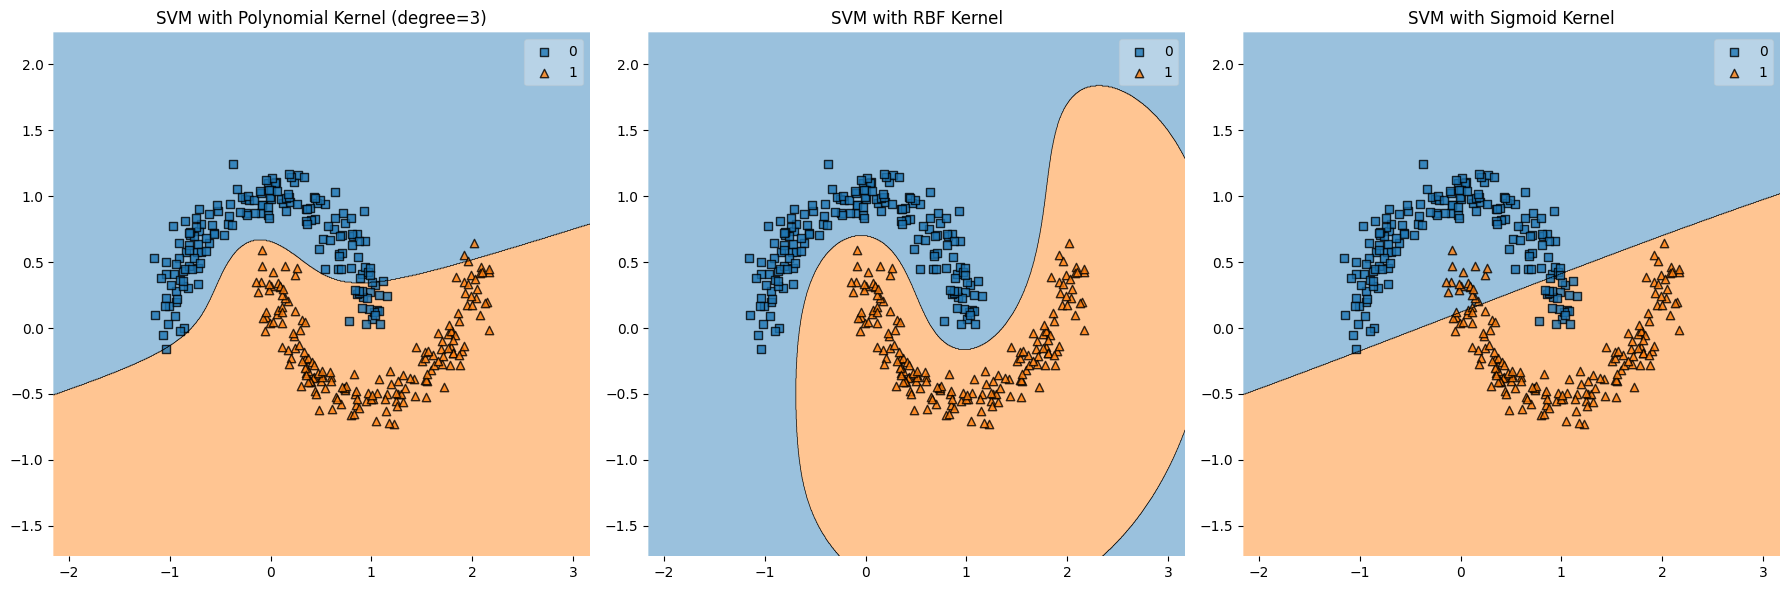

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Define parameter distribution for Randomized Search
param_dist_poly = {
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5],  
    'C': [0.1, 1, 10, 100] 
}

param_dist_rbf = {
    'kernel': ['rbf'],
    'gamma': [0.001, 0.01, 0.1, 1],  
    'C': [0.1, 1, 10, 100]          
}

param_dist_sigmoid = {
    'kernel': ['sigmoid'],
    'gamma': [0.001, 0.01, 0.1, 1],  
    'C': [0.1, 1, 10, 100]           
}

# Set up RandomizedSearchCV for each kernel
random_search_poly = RandomizedSearchCV(SVC(), param_dist_poly, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rbf = RandomizedSearchCV(SVC(), param_dist_rbf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_sigmoid = RandomizedSearchCV(SVC(), param_dist_sigmoid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit models
random_search_poly.fit(X_train, y_train)
random_search_rbf.fit(X_train, y_train)
random_search_sigmoid.fit(X_train, y_train)

# Get best parameters and scores
print(f"Best Polynomial Kernel Params (Random Search): {random_search_poly.best_params_}")
print(f"Best Polynomial Kernel Score (Random Search): {random_search_poly.best_score_}")

print(f"Best RBF Kernel Params (Random Search): {random_search_rbf.best_params_}")
print(f"Best RBF Kernel Score (Random Search): {random_search_rbf.best_score_}")

print(f"Best Sigmoid Kernel Params (Random Search): {random_search_sigmoid.best_params_}")
print(f"Best Sigmoid Kernel Score (Random Search): {random_search_sigmoid.best_score_}")

# Plot the decision regions for the best models

# Use best estimators from Randomized Search
best_poly_rand = random_search_poly.best_estimator_
best_rbf_rand = random_search_rbf.best_estimator_
best_sigmoid_rand = random_search_sigmoid.best_estimator_

# Plot decision regions for each kernel
fig, ax = plt.subplots(1, 3, figsize=(18, 6)) 

# Plot for Polynomial Kernel
ax[0].set_title(f"SVM with Polynomial Kernel (degree={random_search_poly.best_params_['degree']})")
plot_decision_regions(X_train, y_train, clf=best_poly_rand, ax=ax[0])

# Plot for RBF Kernel
ax[1].set_title("SVM with RBF Kernel")
plot_decision_regions(X_train, y_train, clf=best_rbf_rand, ax=ax[1])

# Plot for Sigmoid Kernel
ax[2].set_title("SVM with Sigmoid Kernel")
plot_decision_regions(X_train, y_train, clf=best_sigmoid_rand, ax=ax[2])

# Adjust layout
plt.tight_layout()
plt.show()


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [8]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE

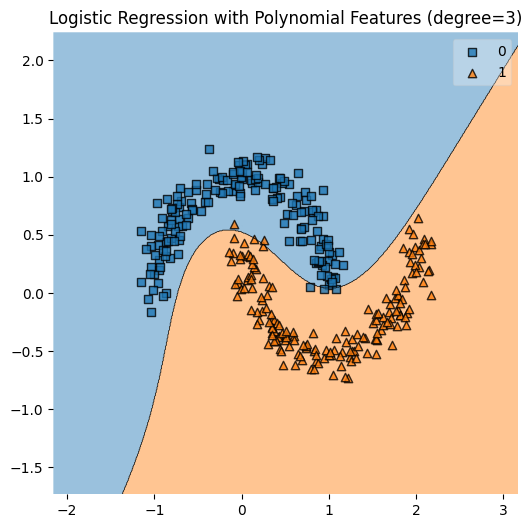

Logistic Regression with Polynomial Features Accuracy: 0.9933333333333333
Best Polynomial Kernel Accuracy (SVM): 0.9257142857142856
Best RBF Kernel Accuracy (SVM): 1.0
Best Sigmoid Kernel Accuracy (SVM): 0.8628571428571428


In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Generate polynomial features (degree=2 as an example)
poly_features = PolynomialFeatures(degree=3)

# Logistic Regression pipeline with Polynomial Features
lr_poly = make_pipeline(poly_features, LogisticRegression())

# Train the Logistic Regression model on the polynomial features
lr_poly.fit(X_train, y_train)

# Plot decision regions for Logistic Regression with polynomial features
plt.figure(figsize=(6, 6))
plot_decision_regions(X_train, y_train, clf=lr_poly)
plt.title("Logistic Regression with Polynomial Features (degree=3)")
plt.show()

# Predict on test set
y_pred_lr_poly = lr_poly.predict(X_test)

# Calculate accuracy or other metric
acc_lr_poly = accuracy_score(y_test, y_pred_lr_poly)

print(f"Logistic Regression with Polynomial Features Accuracy: {acc_lr_poly}")

# Compare with SVM results
print(f"Best Polynomial Kernel Accuracy (SVM): {random_search_poly.best_score_}")
print(f"Best RBF Kernel Accuracy (SVM): {random_search_rbf.best_score_}")
print(f"Best Sigmoid Kernel Accuracy (SVM): {random_search_sigmoid.best_score_}")


observation note:

all models could classify the data points.
The choice of model and kernel becomes more significant when handling more complex data. Logistic Regression with Polynomial Features offers a simple solution for non-linear data, while SVM provides more flexible and robust methods.


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

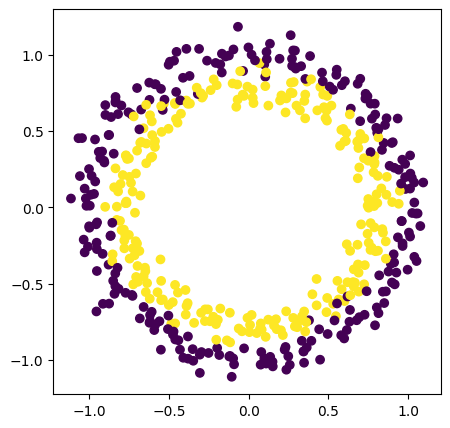

In [52]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

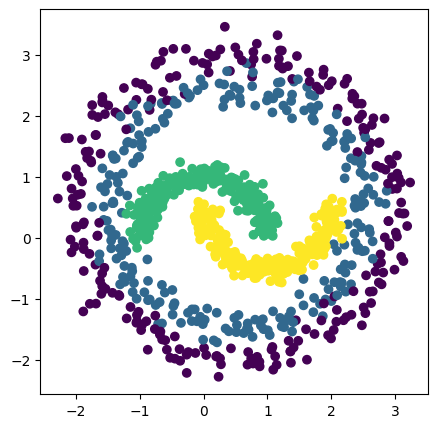

In [53]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [12]:
### YOUR CODE HERE

In [54]:
# Function to plot decision regions for multiple models
def plot_models(X_train, y_train, models, titles):
    fig, ax = plt.subplots(1, len(models), figsize=(16, 5))
    for i, model in enumerate(models):
        ax[i].set_title(titles[i])
        plot_decision_regions(X_train, y_train, clf=model, ax=ax[i])
    plt.tight_layout()
    plt.show()

# Function to train models and evaluate performance
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Logistic Regression with Polynomial Features (degree=3)
    poly_features = PolynomialFeatures(degree=3)
    lr_poly = make_pipeline(poly_features, LogisticRegression())
    lr_poly.fit(X_train, y_train)

    # SVM with RBF kernel
    svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
    svm_rbf.fit(X_train, y_train)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # K-Nearest Neighbors (KNN)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Plot decision boundaries for all models
    models = [lr_poly, svm_rbf, rf, knn]
    titles = [
        "Logistic Regression with Polynomial Features (degree=3)",
        "SVM with RBF Kernel",
        "Random Forest Classifier",
        "K-Nearest Neighbors (KNN)"
    ]
    plot_models(X_train, y_train, models, titles)

    # Predict on the test set
    y_pred_lr_poly = lr_poly.predict(X_test)
    y_pred_svm_rbf = svm_rbf.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    y_pred_knn = knn.predict(X_test)

    # Calculate accuracy for each model
    acc_lr_poly = accuracy_score(y_test, y_pred_lr_poly)
    acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
    acc_rf = accuracy_score(y_test, y_pred_rf)
    acc_knn = accuracy_score(y_test, y_pred_knn)

    # Print accuracies
    print(f"Logistic Regression with Polynomial Features Accuracy: {acc_lr_poly}")
    print(f"SVM with RBF Kernel Accuracy: {acc_svm_rbf}")
    print(f"Random Forest Classifier Accuracy: {acc_rf}")
    print(f"KNN Accuracy: {acc_knn}")

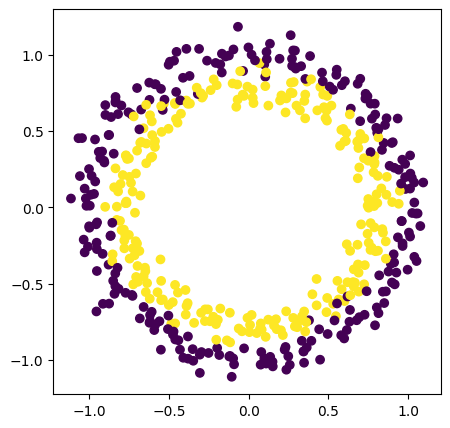

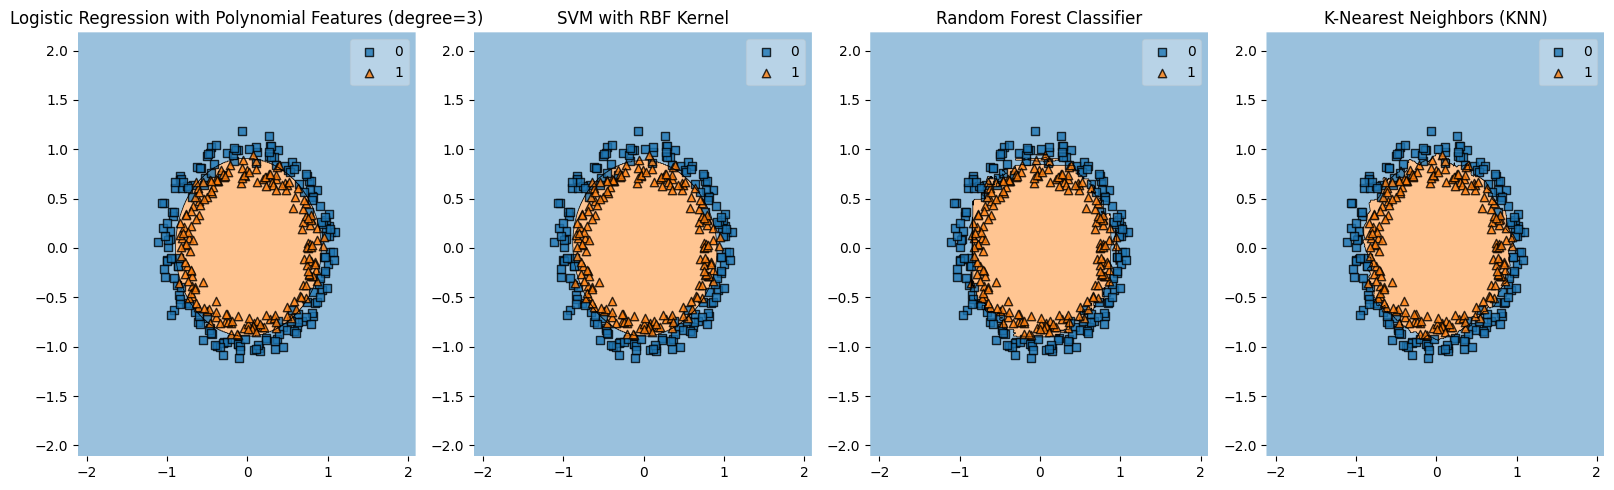

Logistic Regression with Polynomial Features Accuracy: 0.94
SVM with RBF Kernel Accuracy: 0.9466666666666667
Random Forest Classifier Accuracy: 0.9266666666666666
KNN Accuracy: 0.9133333333333333


In [37]:
# circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

X_train, X_test, y_train, y_test = train_test_split(circles_points, circles_labels, test_size=0.3, random_state=42)

# Train and evaluate models on the Circles dataset
train_and_evaluate(X_train, X_test, y_train, y_test)

d:\HS\M3_Advance machine\M3_2024_Advance-ML\.venv\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
d:\HS\M3_Advance machine\M3_2024_Advance-ML\.venv\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
d:\HS\M3_Advance machine\M3_2024_Advance-ML\.venv\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
d:\HS\M3_Advance machine\M3_2024_Advance-ML\.venv

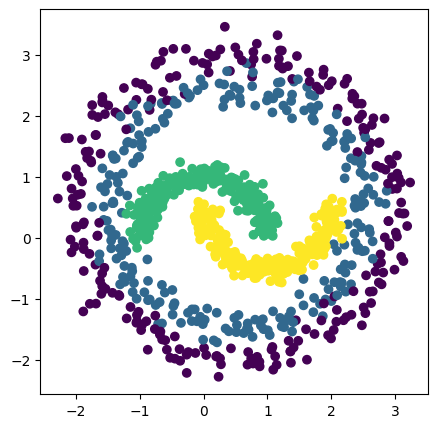

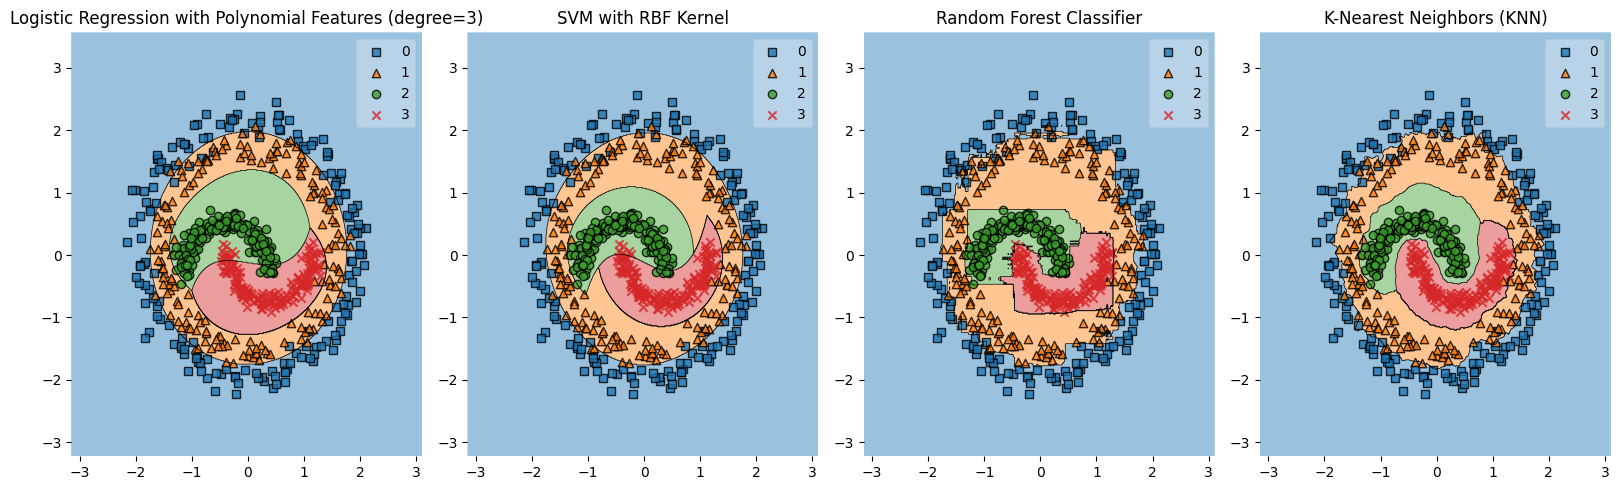

Logistic Regression with Polynomial Features Accuracy: 0.9266666666666666
SVM with RBF Kernel Accuracy: 0.9566666666666667
Random Forest Classifier Accuracy: 0.93
KNN Accuracy: 0.94


In [55]:
plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.3, random_state=42)

#Standardize the data for better performance of models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train and evaluate models on the scaled combined dataset
train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)


Observation note:

SVM with RBF Kernel consistently performs the best across both datasets due to its ability to create flexible, non-linear decision boundaries.
Logistic Regression with Polynomial Features handles non-linearity well but is less flexible than SVM with RBF, leading to slightly lower accuracy.

Then I add some model that deal with non-linier problem such as Random Forest and KNN to test which one is fit with this problem.
I just look at this as a reference:
https://medium.com/@mohamadhasan.sarvandani/top-algorithms-of-non-linear-regression-in-machine-learning-proposed-python-library-and-python-c871752ddd81


As a result it seem like the model which we try to use above it good but they also have another model fit well with this problem.
